In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math

1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [37]:
def mse(y, y_pred):
    n = len(y)
    err = np.sum((y - y_pred)**2) / n
    return err

In [38]:
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])

In [39]:
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [40]:
n = X.shape[0]
n

10

In [48]:
a = 400

In [53]:
b = 2.7

In [54]:
y_pred = a + b * X

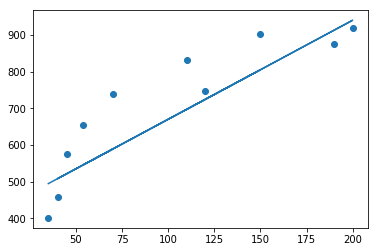

In [55]:
plt.scatter(X, y)
plt.plot(X, y_pred);

In [56]:
mse(y, y_pred)

7797.134000000001

In [57]:
mse_ = np.sum((y_pred - y)**2) / n
mse_

7797.134000000001

In [58]:
b = (np.mean(X*y) - np.mean(X)*np.mean(y)) / (np.mean(X**2) - np.mean(X)**2)
b

2.620538882402765

In [59]:
a = np.mean(y) - b * np.mean(X)
a

444.1773573243596

In [60]:
444.1773573243596, 2.620538882402765

(444.1773573243596, 2.620538882402765)

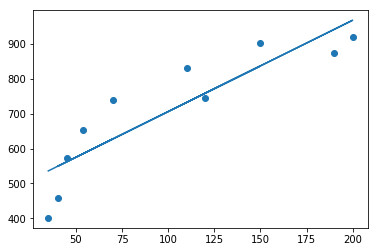

In [62]:
a = 444.1773573243596
b = 2.620538882402765
y_pred = a + X*b
plt.scatter(X, y)
plt.plot(X, y_pred)

In [63]:
mse_ = np.sum((y_pred - y)**2) / n
mse_

6470.414201176658

2 способ

$W = (X \cdot X^T)^{-1} \cdot X \cdot y^T$

In [64]:
np.ones((1, 10))

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [65]:
X = X.reshape((1, 10))
X = np.vstack([np.ones((1, 10)), X])
X

array([[  1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.],
       [ 35.,  45., 190., 200.,  40.,  70.,  54., 150., 120., 110.]])

In [66]:
y = y.reshape((1, 10))
y

array([[401, 574, 874, 919, 459, 739, 653, 902, 746, 832]])

In [67]:
X

array([[  1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.],
       [ 35.,  45., 190., 200.,  40.,  70.,  54., 150., 120., 110.]])

In [68]:
X.T

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [69]:
y

array([[401, 574, 874, 919, 459, 739, 653, 902, 746, 832]])

In [70]:
W = np.dot(np.linalg.inv(np.dot(X, X.T)), X) @ y.T
W

array([[444.17735732],
       [  2.62053888]])

Способ 2а

$W = (X \cdot X^T)^{-1} \cdot X \cdot y^T$

$W = (X^T \cdot X)^{-1} \cdot X^T \cdot y$

X 10x2

X.T 2x10

2x10 * 10x2 = 2x2

2x2 2x10

2x10  10x1

In [71]:
X = X.T
X

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [72]:
y = y.T

In [73]:
y

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [74]:
W = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T) @ y
W

array([[444.17735732],
       [  2.62053888]])

In [75]:
w0 = W[0, 0]
w0

444.17735732435915

In [76]:
w1 = W[1, 0]
w1

2.6205388824027684

Без intercept

In [85]:
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])

In [86]:
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [89]:
X = X.reshape(1,-1)
X

array([[ 35,  45, 190, 200,  40,  70,  54, 150, 120, 110]])

In [91]:
y = y.reshape(1,-1)
y

array([[401, 574, 874, 919, 459, 739, 653, 902, 746, 832]])

In [92]:
W = np.linalg.inv(np.dot(X, X.T)) @ X @ y.T

In [93]:
W

array([[5.88982042]])

In [94]:
b = 5.88982042

In [95]:
y_pred = b * X

In [97]:
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [98]:
mse(y, y_pred)

56516.85841571943

3 способ

In [180]:
X= X.T
X

array([[  1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.],
       [ 35.,  45., 190., 200.,  40.,  70.,  54., 150., 120., 110.]])

In [193]:
y = y.reshape((1, 10))
y

array([[401, 574, 874, 919, 459, 739, 653, 902, 746, 832]])

In [194]:
def mse_(w1, y=y[0], X=X[1], n=10):
    return np.sum((w1*X - y)**2) / n

In [195]:
f = 1/n * np.sum((w1*X - y)**2)

In [196]:
f_p = (1/n) * np.sum(2 * (w1*X - y) * X) 

In [197]:
alpha = 1e-7

In [198]:
w1 = 0.1
w1

0.1

In [199]:
for i in range(20000):
    y_pred = w1*X[1]
    w1 -= alpha * (2/n) * np.sum((y_pred - y) * X[1]) 
    if i%2000 == 0:
        print('Iteration: {i}, w1 = {w1}, mse={mse}'.format(i=i, w1=w1, mse=mse_(w1)))

Iteration: 0, w1 = 0.115952808, mse=515794.9112047831
Iteration: 2000, w1 = 5.866650574656343, mse=56524.254269626384
Iteration: 4000, w1 = 5.889727442292625, mse=56516.85853481644
Iteration: 6000, w1 = 5.8898200470236475, mse=56516.85841572132
Iteration: 8000, w1 = 5.889820418635448, mse=56516.85841571941
Iteration: 10000, w1 = 5.88982042012668, mse=56516.85841571941
Iteration: 12000, w1 = 5.889820420132528, mse=56516.8584157194
Iteration: 14000, w1 = 5.889820420132528, mse=56516.8584157194
Iteration: 16000, w1 = 5.889820420132528, mse=56516.8584157194
Iteration: 18000, w1 = 5.889820420132528, mse=56516.8584157194


In [200]:
X[1]

array([ 35.,  45., 190., 200.,  40.,  70.,  54., 150., 120., 110.])

In [201]:
def mse2(y, y_pred):
    n = y.shape[1]
    
    err = np.sum((y - y_pred)**2) / n
    return err

In [203]:
W = np.array([[0.1, 0.1]])

alpha = 5*1e-5

for i in range(400001):
    y_pred = np.dot(W, X)
    W[0, 0] -= alpha * (2/n) * np.sum((y_pred - y)) 
    W[0, 1] -= alpha * (2/n) * np.sum((y_pred - y) * X[1]) 
    if i%20000 == 0:
        print('Iteration: {i}, w0 = {w0}, w1 = {w1}, mse={mse}'.format(i=i, w0=W[0, 0],
                                                            w1=W[0, 1], mse=mse2(y, y_pred)))

Iteration: 0, w0 = 0.169966, w1 = 8.07539, mse=518196.3839999999
Iteration: 20000, w0 = 176.82467712430216, w1 = 4.588372812085087, mse=24602.656409496958
Iteration: 40000, w0 = 283.2006120221053, w1 = 3.8053988997347976, mse=13044.096512851245
Iteration: 60000, w0 = 347.25103323171703, w1 = 3.3339594813141433, mse=8853.643955023424
Iteration: 80000, w0 = 385.8166774356474, w1 = 3.0500992891224574, mse=7334.432842529767
Iteration: 100000, w0 = 409.03758503899854, w1 = 2.8791831426087984, mse=6783.6564353341655
Iteration: 120000, w0 = 423.0192145710212, w1 = 2.7762721676196027, mse=6583.97737280726
Iteration: 140000, w0 = 431.43774702935406, w1 = 2.7143080466792666, mse=6511.585513804706
Iteration: 160000, w0 = 436.506661821421, w1 = 2.6769985927136886, mse=6485.340492501363
Iteration: 180000, w0 = 439.5587255031134, w1 = 2.6545340546215654, mse=6475.825594656448
Iteration: 200000, w0 = 441.3964152452394, w1 = 2.6410078456302113, mse=6472.376053505287
Iteration: 220000, w0 = 442.5029136

3. В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?

In [ ]:
Если известны значения числовые характеристики математическое ожидание, дисперсия то используется функция Лапласа, 
при неизветных характеристиках используется распределение Стьюдента